# Import modules

In [1]:
from sklearn.datasets import load_diabetes
import pickle
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import os
import torch


from synthcity.metrics.eval_performance import (
    PerformanceEvaluatorMLP,
    PerformanceEvaluatorXGB,
)
from synthcity.utils import reproducibility
from synthcity.plugins import Plugins
import synthcity.logger as log
from synthcity.plugins.core.dataloader import GenericDataLoader
from DGE_utils import metric_different_datasets, mean_across_pandas, add_std, get_folder_names

reproducibility.clear_cache()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
Plugins(categories=["generic"]).list()

assert device.type == 'cuda'


/home/bv292/miniconda/envs/test_env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load data and settings

In [ ]:
from DGE_data import get_real_and_synthetic

# let's restrict ourselves to classification datasets
datasets = ['moons', 'circles', #'gaussian',
            'adult',  'seer', 'covid']
# ['moons', 'circles','cal_housing', 'adult', 'diabetes', 'breast_cancer',  'seer', 'cutract' ]
model_name = 'ctgan'  # synthetic data model

p_train = 0.8  # proportion of training data for generative model. Default values if None
n_models = 20  # number of models in ensemble, for each run
max_n = 2000  # maximum number of data points to use for training generative model.
nsyn = 2000  # number of synthetic data points per synthetic dataset. Defaults to same as generative training size if None

num_runs = 10 # Number of runs. Don't choose to large, since total number of synthetic datasets is num_runs*n_models

load = True  # results
load_syn = True  # data
save = True  # save results and data

outlier = False

verbose = False

if nsyn is None:
    nsyn = max_n


In [3]:
for dataset in ['covid']:
    print('Dataset:', dataset)
    workspace_folder, results_folder = get_folder_names(
        dataset, model_name, max_n=max_n, nsyn=nsyn)

    X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                          p_train=p_train,
                                          n_models=num_runs*n_models,
                                          model_name=model_name,
                                          load_syn=load_syn,
                                          verbose=verbose,
                                          max_n=max_n,
                                          nsyn=nsyn)

    print('Shape of each synthetic dataset:', X_syns[0].shape)
    print('Target type:', X_gt.targettype)



Dataset: covid
n_total 20000 n_train: 2000
Shape of each synthetic dataset: (2000, 19)
Target type: classification


# Experiments

## Model Training

n_total 10000 n_train: 2000
Dataset moons

Saving uncertainty_results/moons_ctgan_nmax_2000_nsyn_2000supervised_task_mlp_DGE_K20_run_0_mean.png


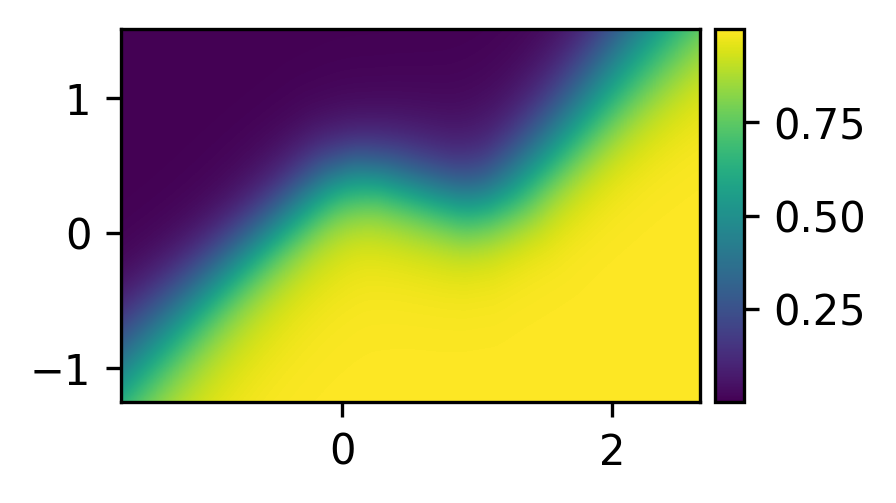

Saving uncertainty_results/moons_ctgan_nmax_2000_nsyn_2000supervised_task_mlp_DGE_K20_run_0_std.png


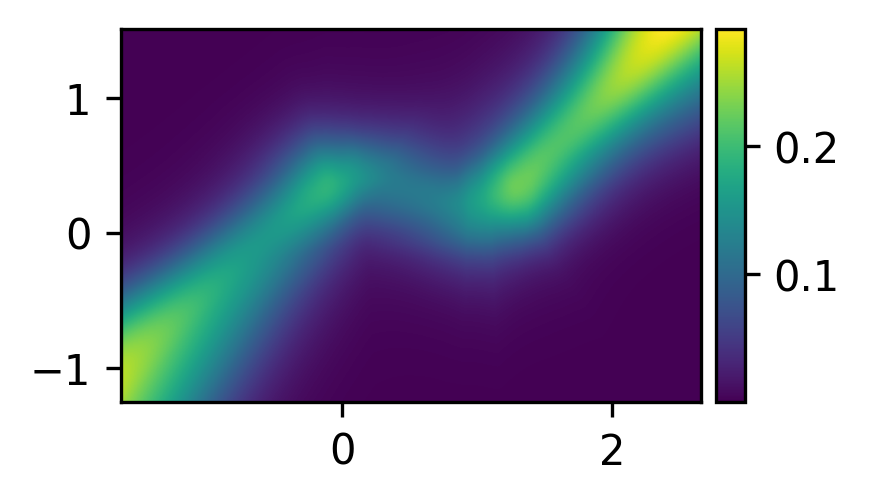

Saving uncertainty_results/moons_ctgan_nmax_2000_nsyn_2000supervised_task_mlp_DGE_K10_run_0_mean.png


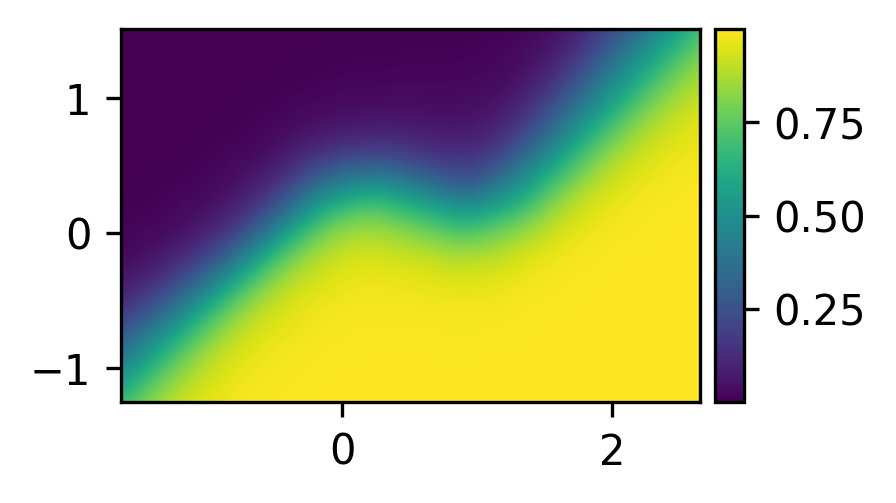

Saving uncertainty_results/moons_ctgan_nmax_2000_nsyn_2000supervised_task_mlp_DGE_K10_run_0_std.png


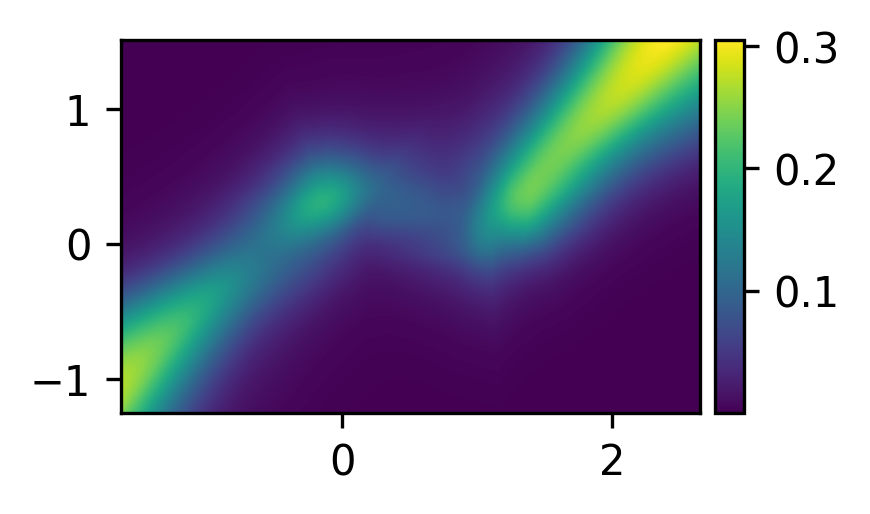

Saving uncertainty_results/moons_ctgan_nmax_2000_nsyn_2000supervised_task_mlp_DGE_K5_run_0_mean.png


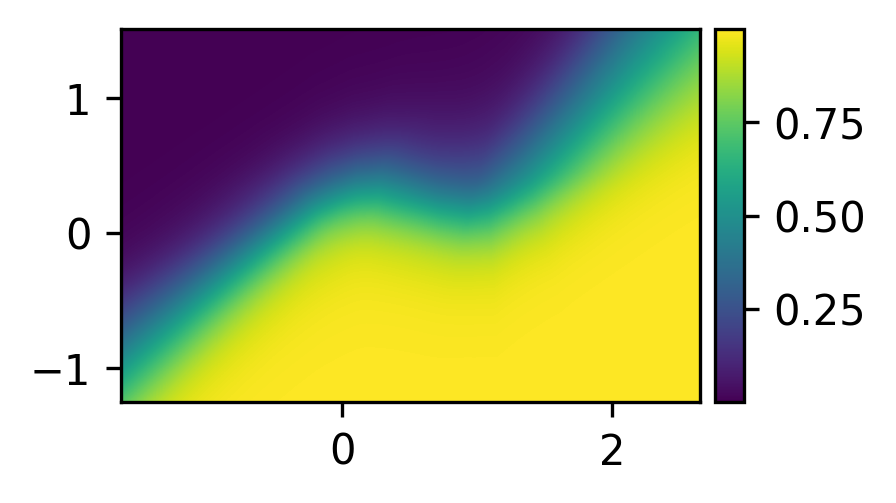

Saving uncertainty_results/moons_ctgan_nmax_2000_nsyn_2000supervised_task_mlp_DGE_K5_run_0_std.png


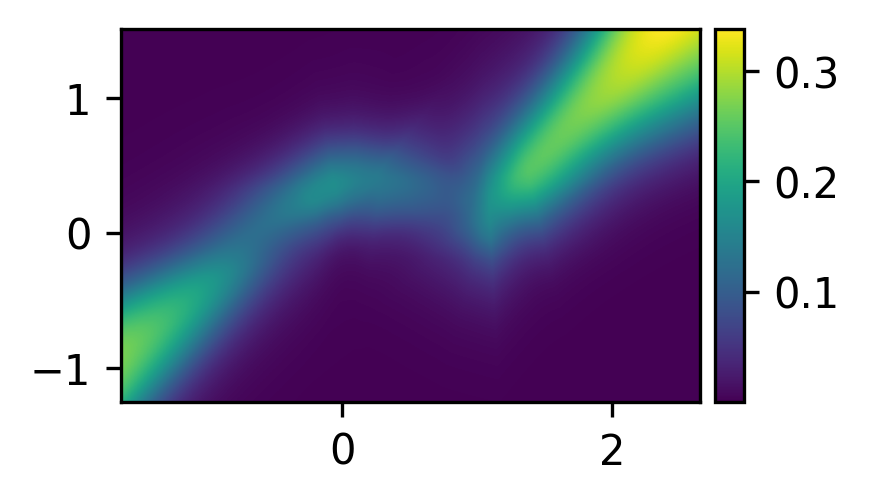

Saving uncertainty_results/moons_ctgan_nmax_2000_nsyn_2000supervised_task_mlp_naive_m0_mean.png


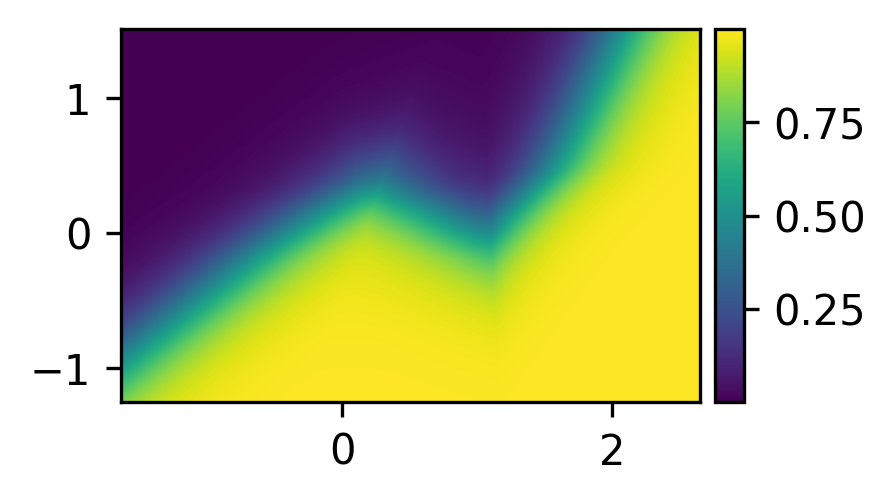

Saving uncertainty_results/moons_ctgan_nmax_2000_nsyn_2000supervised_task_mlp_naive_m0_std.png


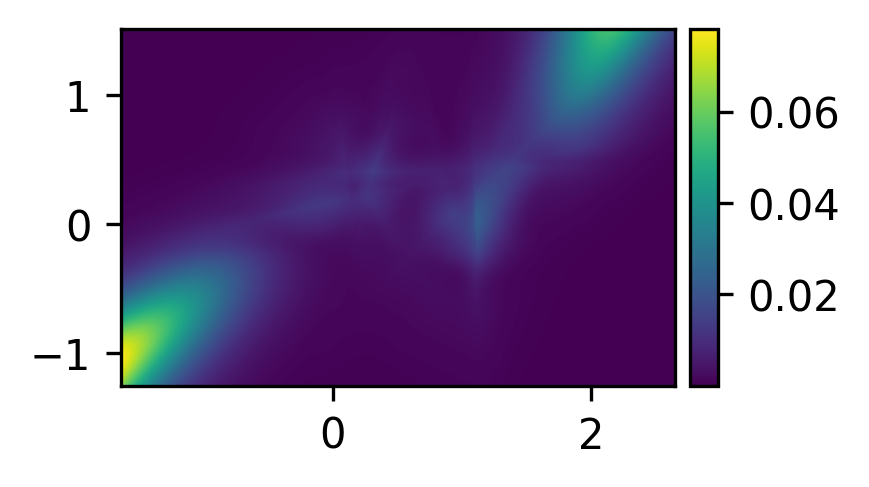

Saving uncertainty_results/moons_ctgan_nmax_2000_nsyn_2000supervised_task_mlp_oraclemean.png


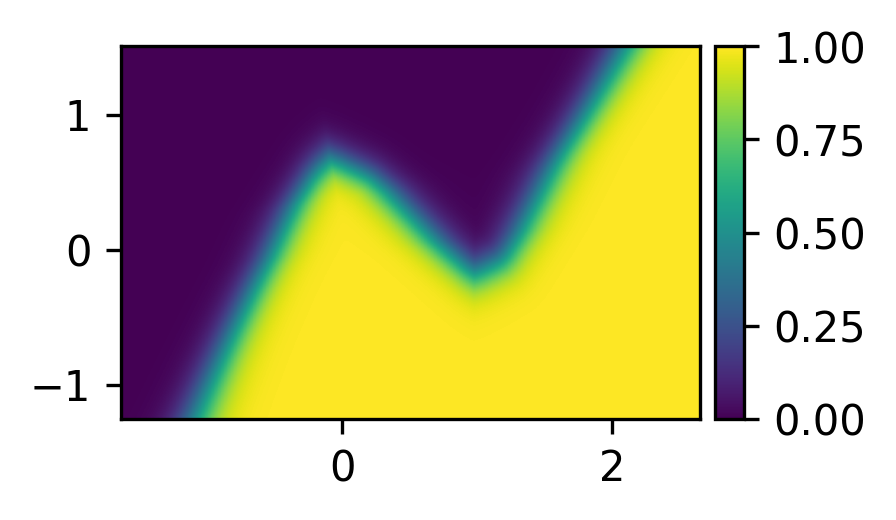

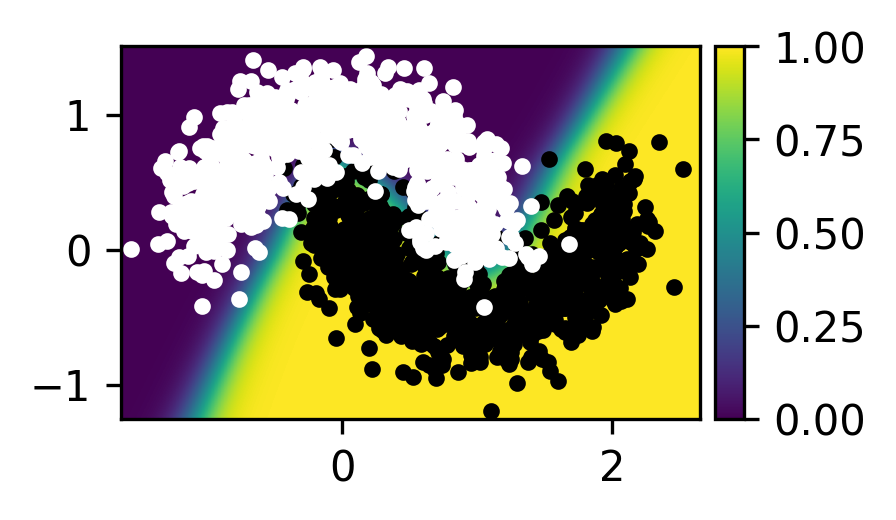

Saving uncertainty_results/moons_ctgan_nmax_2000_nsyn_2000supervised_task_mlp_oraclestd.png


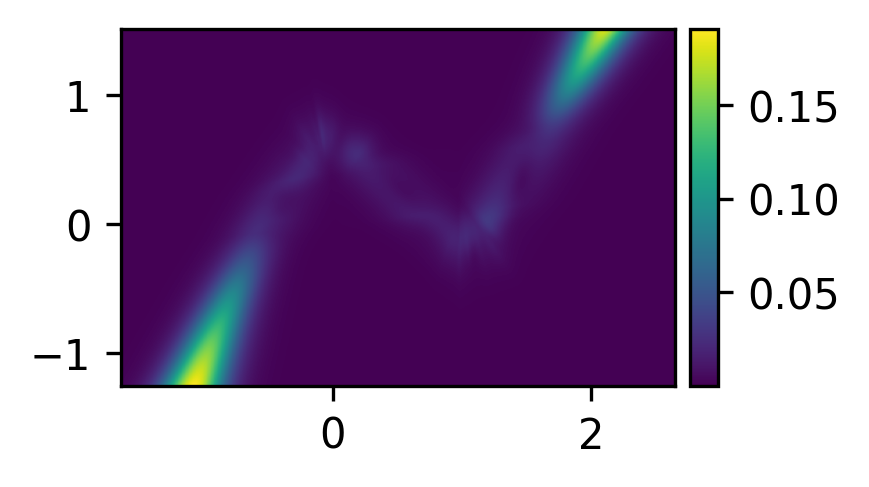

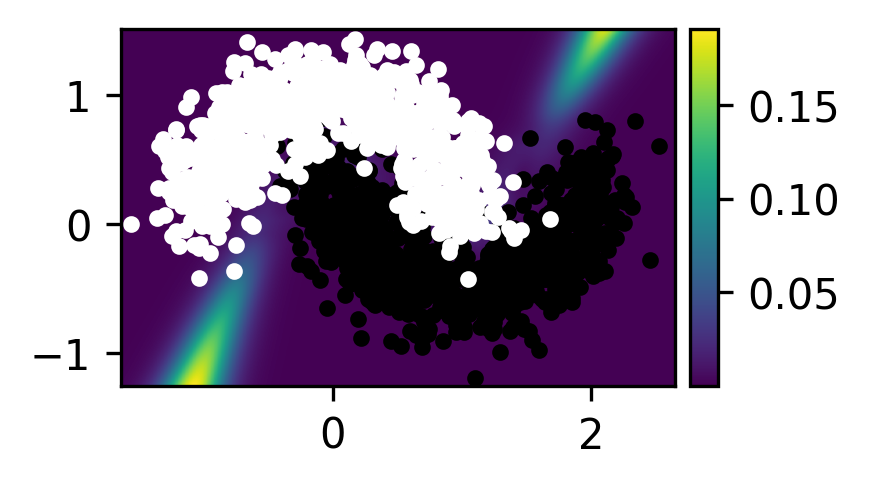

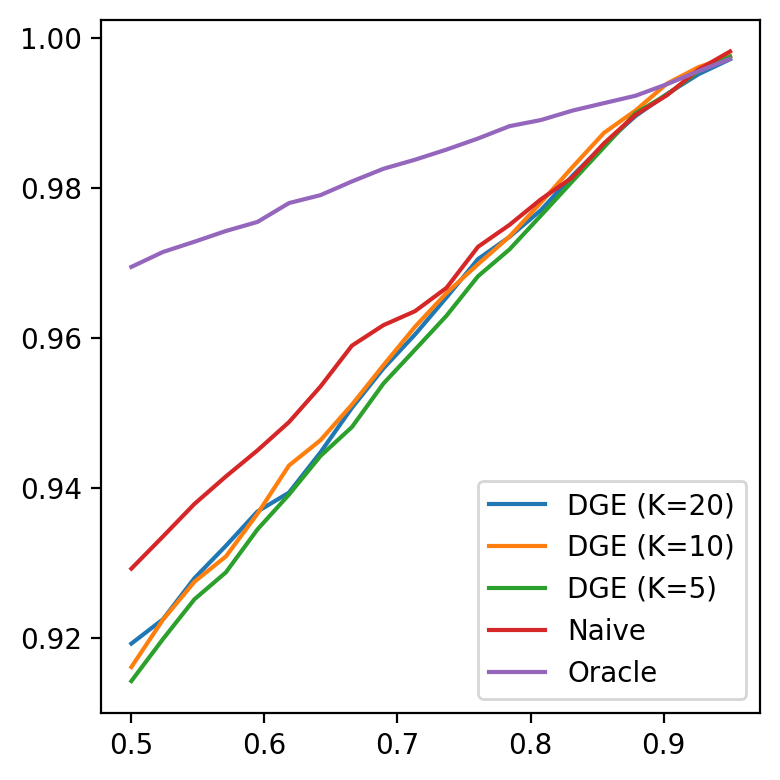

\begin{tabular}{lrrrrrrr}
\toprule
{} &    AUC &    Acc &     F1 &  Precision &  Recall &    NLL &  Brier \\
\midrule
DGE\$\_20\$         &  0.981 &  0.919 &  0.921 &      0.901 &   0.942 &  0.193 &  0.057 \\
DGE\$\_10\$         &  0.980 &  0.916 &  0.917 &      0.909 &   0.925 &  0.194 &  0.058 \\
DGE\$\_5\$          &  0.978 &  0.914 &  0.915 &      0.909 &   0.921 &  0.202 &  0.060 \\
Naive (single)   &  0.985 &  0.933 &  0.931 &      0.957 &   0.906 &  0.178 &  0.050 \\
Naive (ensemble) &  0.984 &  0.929 &  0.927 &      0.954 &   0.902 &  0.183 &  0.052 \\
Oracle           &  0.996 &  0.970 &  0.969 &      0.970 &   0.969 &  0.085 &  0.024 \\
\bottomrule
\end{tabular}

n_total 10000 n_train: 2000
Dataset circles

Saving uncertainty_results/circles_ctgan_nmax_2000_nsyn_2000supervised_task_mlp_DGE_K20_run_0_mean.png


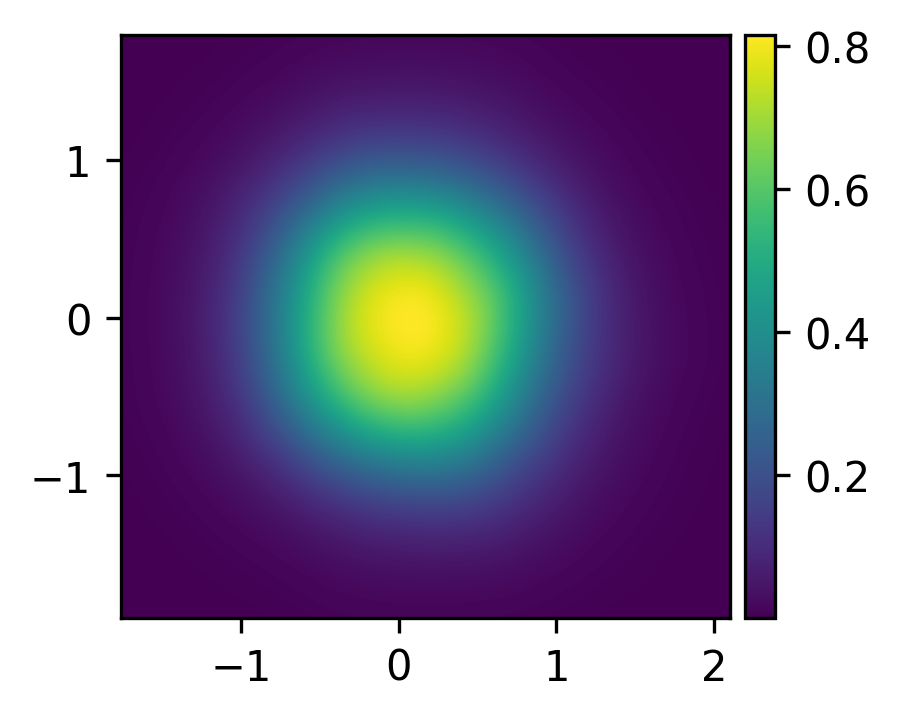

Saving uncertainty_results/circles_ctgan_nmax_2000_nsyn_2000supervised_task_mlp_DGE_K20_run_0_std.png


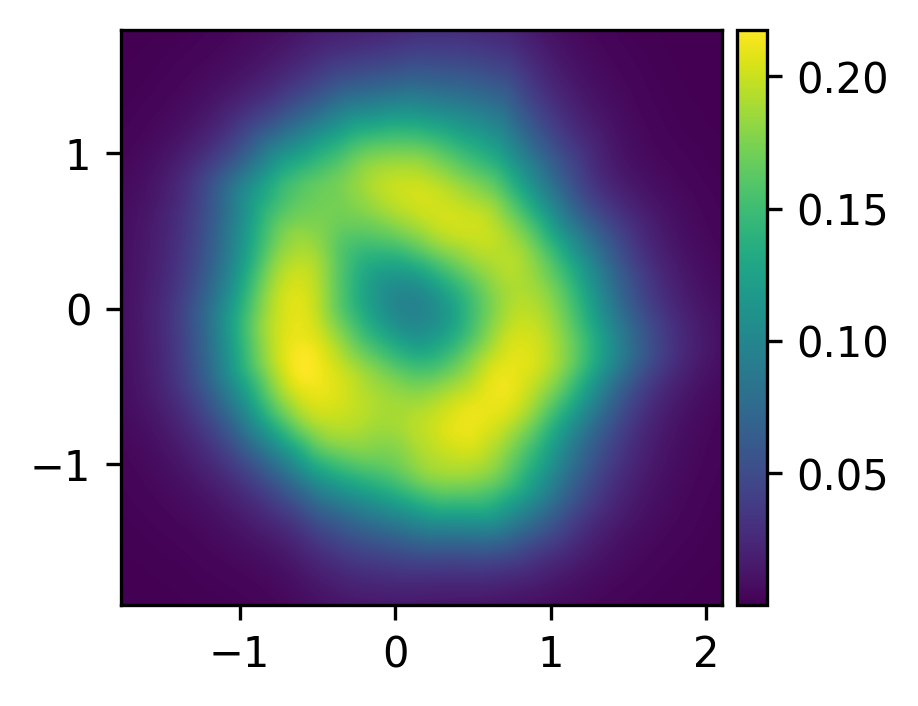

Saving uncertainty_results/circles_ctgan_nmax_2000_nsyn_2000supervised_task_mlp_DGE_K10_run_0_mean.png


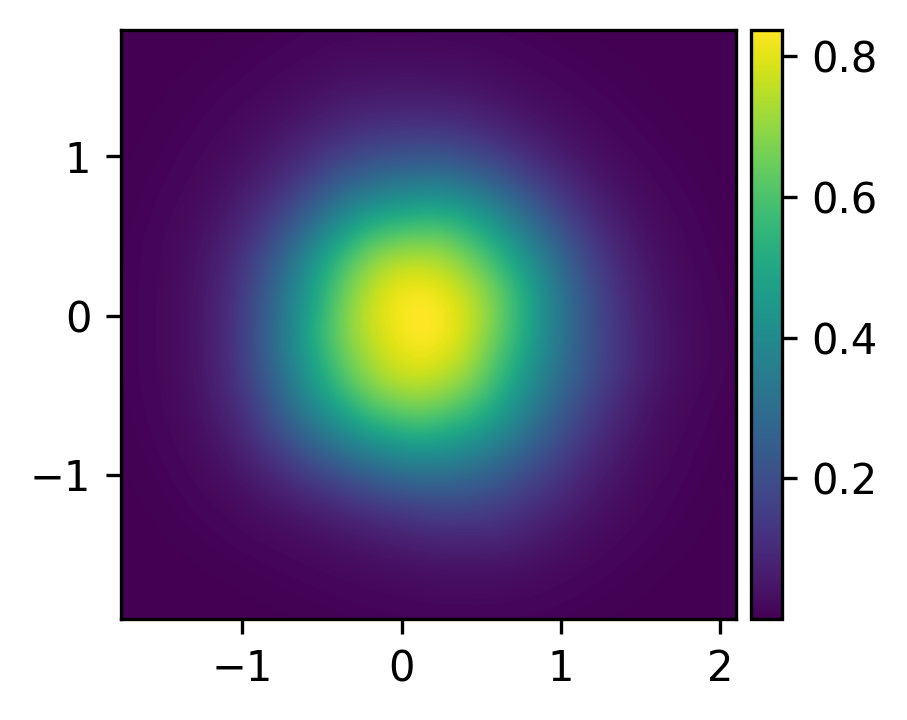

Saving uncertainty_results/circles_ctgan_nmax_2000_nsyn_2000supervised_task_mlp_DGE_K10_run_0_std.png


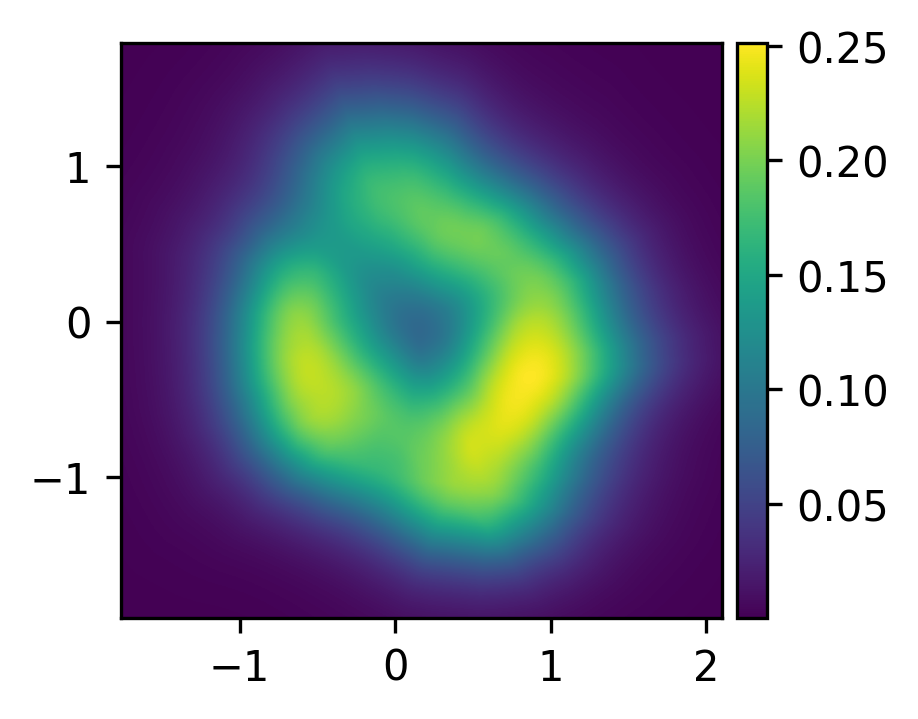

Saving uncertainty_results/circles_ctgan_nmax_2000_nsyn_2000supervised_task_mlp_DGE_K5_run_0_mean.png


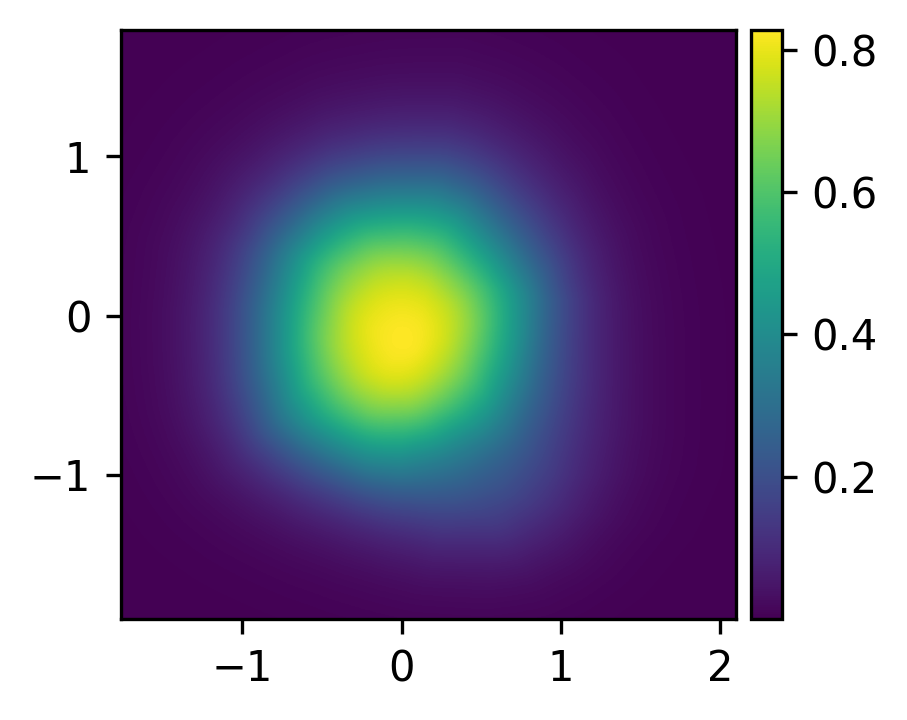

Saving uncertainty_results/circles_ctgan_nmax_2000_nsyn_2000supervised_task_mlp_DGE_K5_run_0_std.png


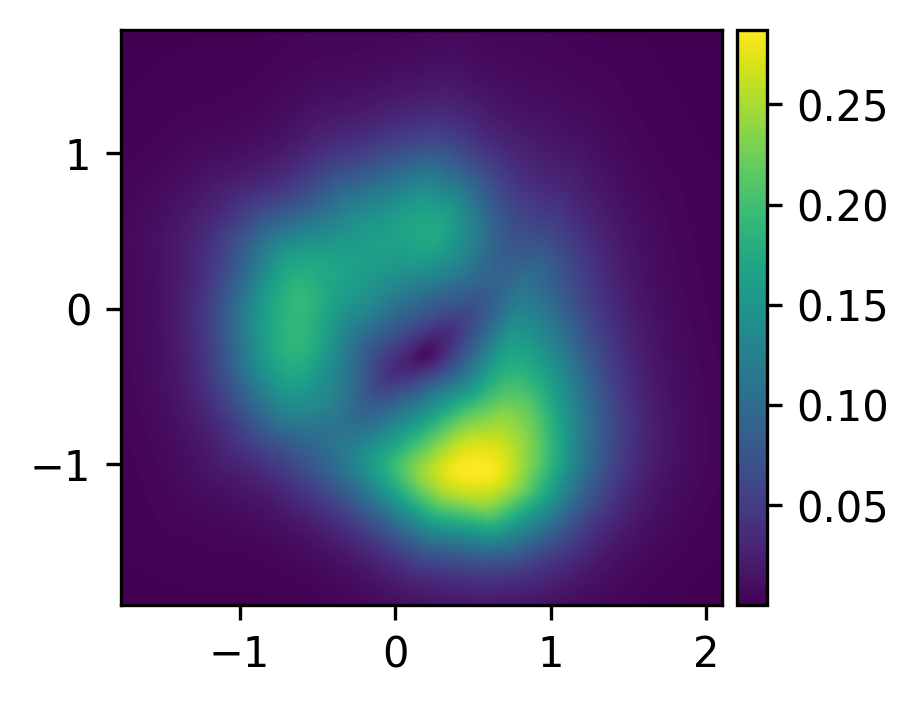

Saving uncertainty_results/circles_ctgan_nmax_2000_nsyn_2000supervised_task_mlp_naive_m0_mean.png


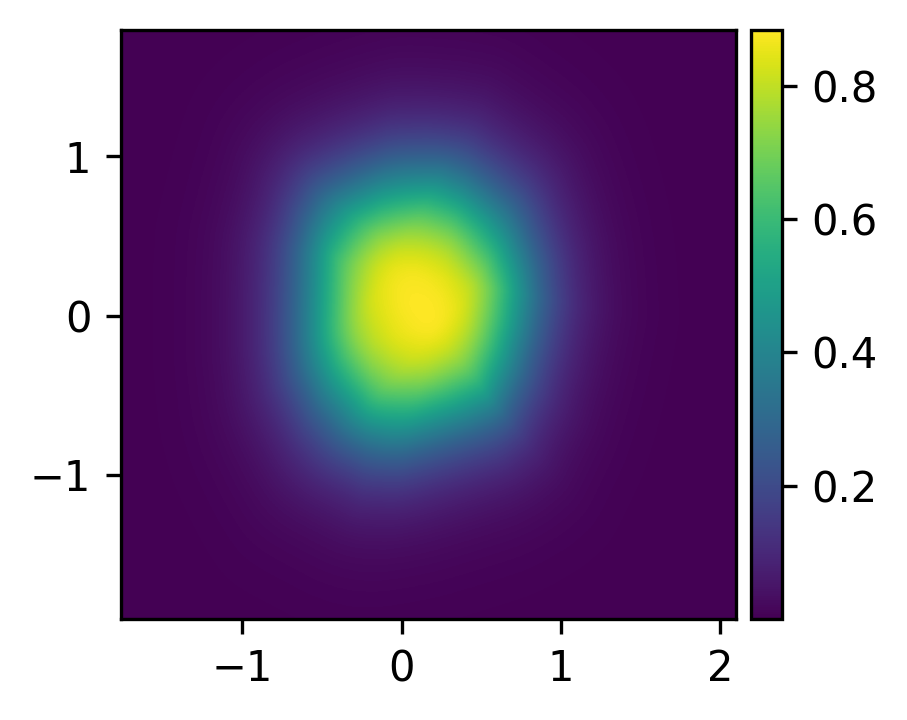

Saving uncertainty_results/circles_ctgan_nmax_2000_nsyn_2000supervised_task_mlp_naive_m0_std.png


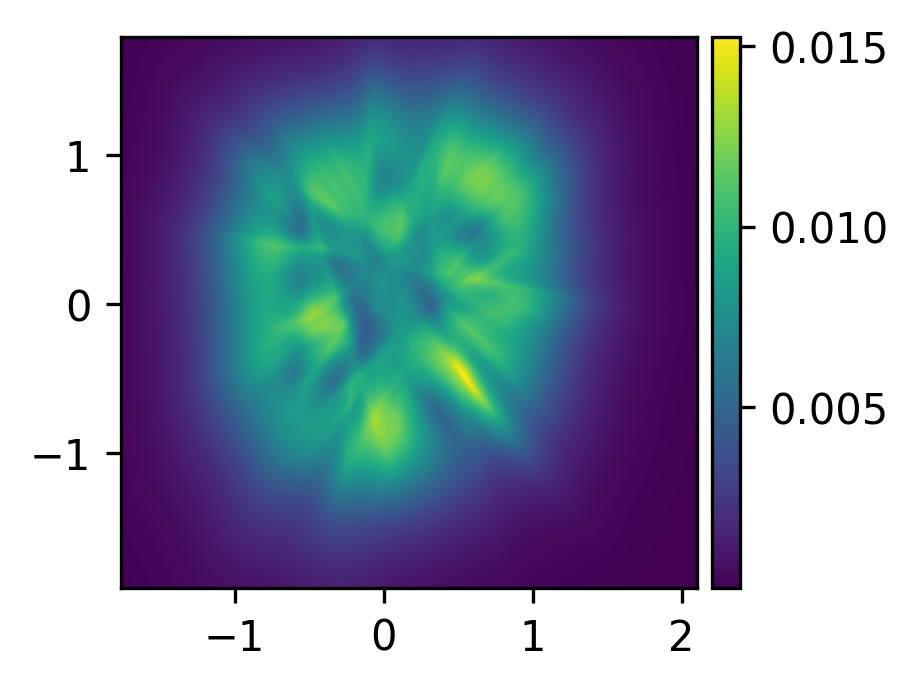

Saving uncertainty_results/circles_ctgan_nmax_2000_nsyn_2000supervised_task_mlp_oraclemean.png


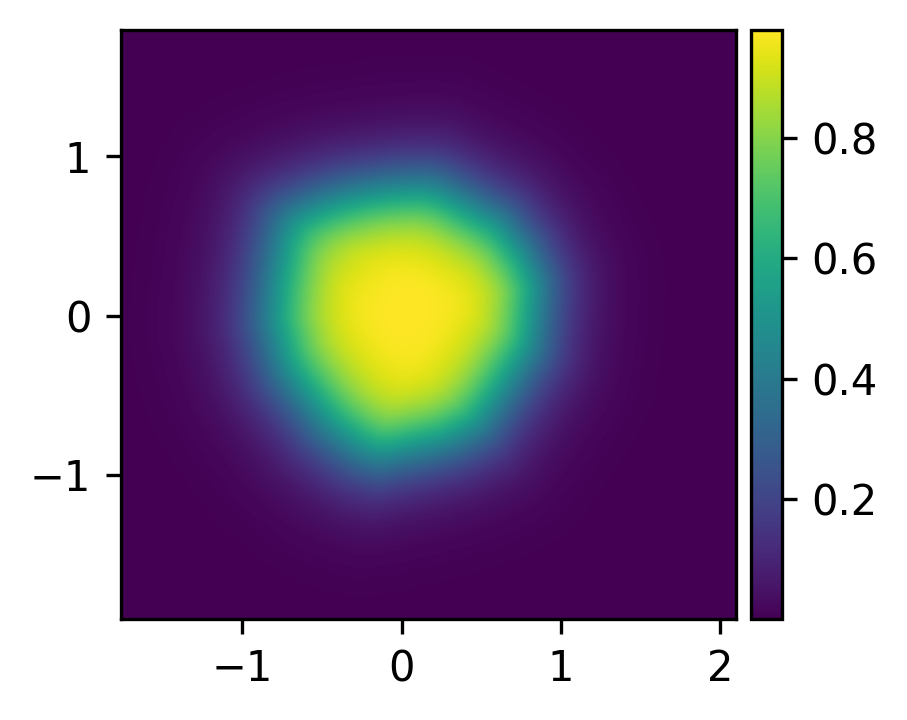

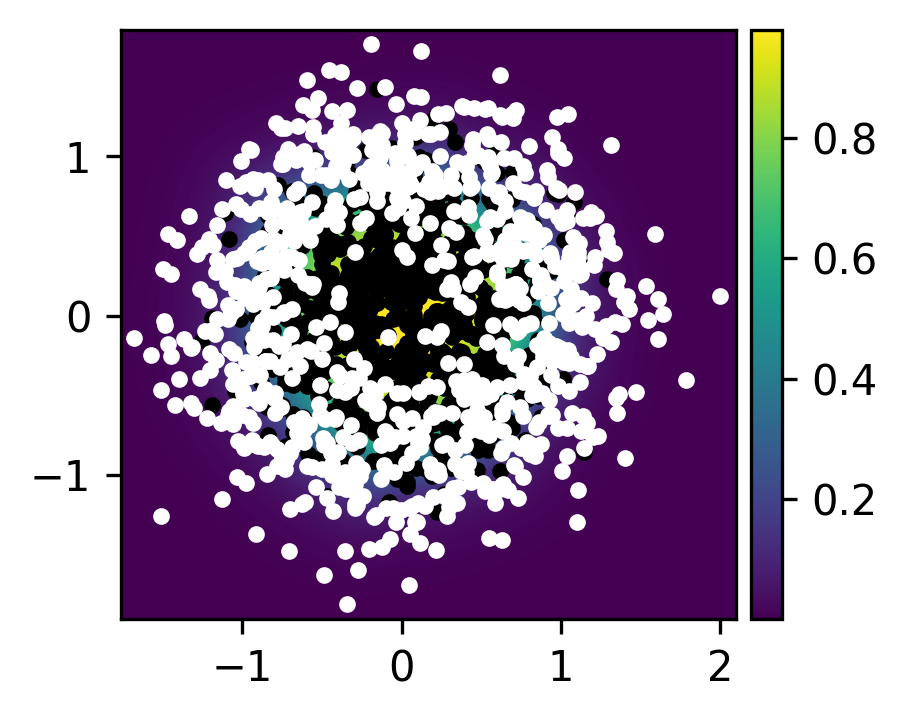

Saving uncertainty_results/circles_ctgan_nmax_2000_nsyn_2000supervised_task_mlp_oraclestd.png


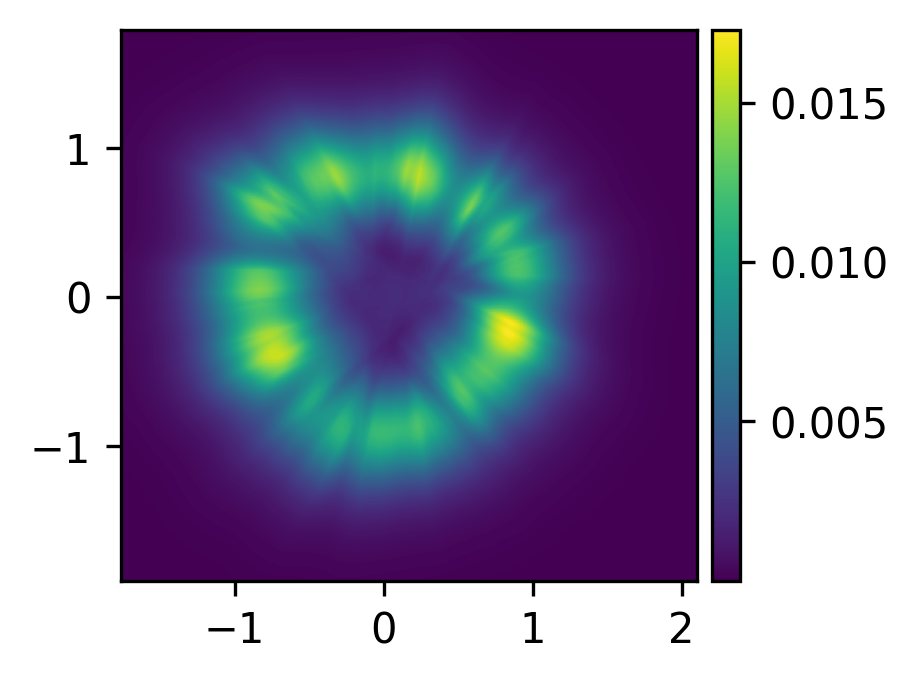

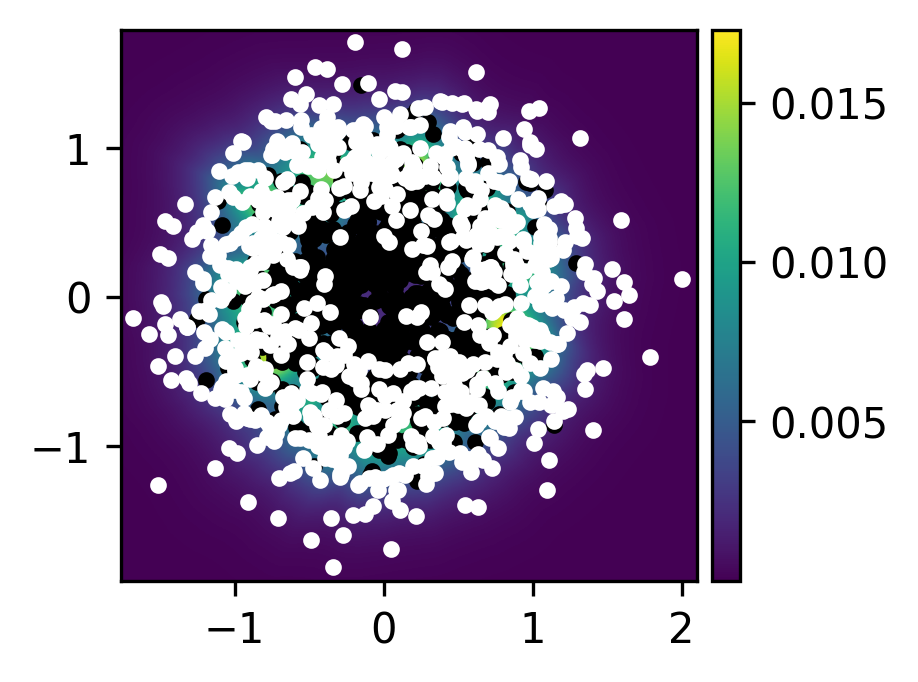

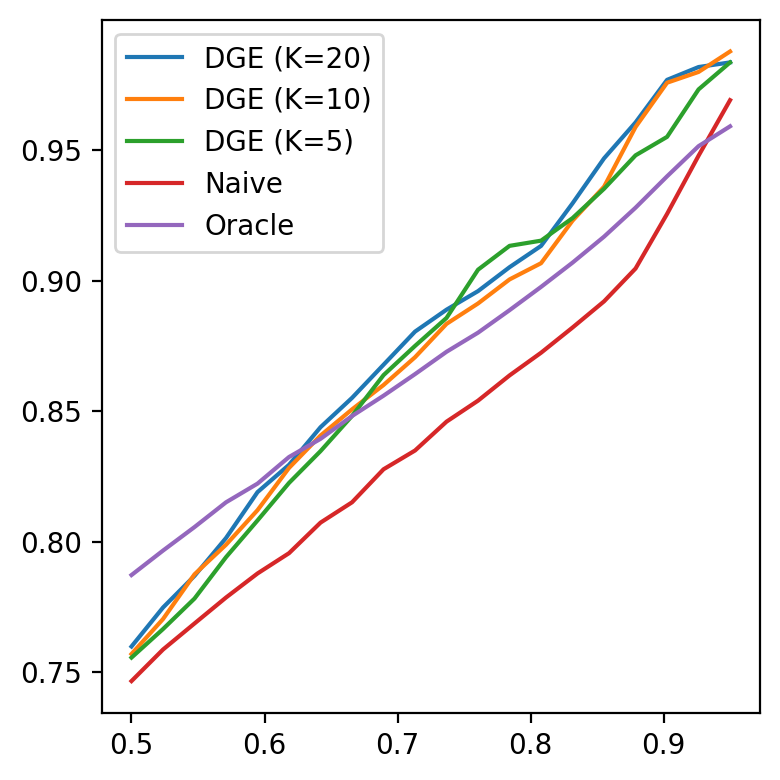

\begin{tabular}{lrrrrrrr}
\toprule
{} &    AUC &    Acc &     F1 &  Precision &  Recall &    NLL &  Brier \\
\midrule
DGE\$\_20\$         &  0.863 &  0.760 &  0.727 &      0.841 &   0.640 &  0.505 &  0.167 \\
DGE\$\_10\$         &  0.855 &  0.757 &  0.728 &      0.827 &   0.650 &  0.508 &  0.168 \\
DGE\$\_5\$          &  0.863 &  0.756 &  0.719 &      0.847 &   0.624 &  0.506 &  0.168 \\
Naive (single)   &  0.857 &  0.751 &  0.711 &      0.847 &   0.612 &  0.513 &  0.170 \\
Naive (ensemble) &  0.857 &  0.747 &  0.703 &      0.850 &   0.599 &  0.516 &  0.172 \\
Oracle           &  0.868 &  0.787 &  0.789 &      0.784 &   0.793 &  0.455 &  0.147 \\
\bottomrule
\end{tabular}

n_total 32561 n_train: 2000
Dataset adult



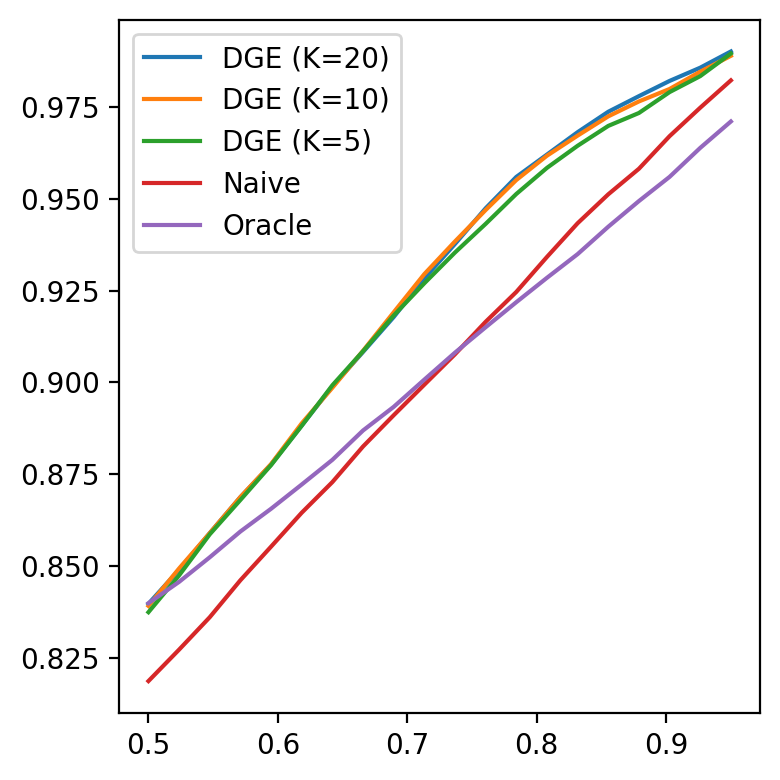

\begin{tabular}{lrrrrrrr}
\toprule
{} &    AUC &    Acc &     F1 &  Precision &  Recall &    NLL &  Brier \\
\midrule
DGE\$\_20\$         &  0.893 &  0.840 &  0.623 &      0.719 &   0.550 &  0.344 &  0.110 \\
DGE\$\_10\$         &  0.891 &  0.839 &  0.629 &      0.707 &   0.567 &  0.347 &  0.111 \\
DGE\$\_5\$          &  0.887 &  0.837 &  0.632 &      0.694 &   0.581 &  0.351 &  0.112 \\
Naive (single)   &  0.871 &  0.816 &  0.637 &      0.607 &   0.669 &  0.382 &  0.123 \\
Naive (ensemble) &  0.872 &  0.819 &  0.638 &      0.615 &   0.662 &  0.378 &  0.123 \\
Oracle           &  0.889 &  0.840 &  0.627 &      0.714 &   0.558 &  0.354 &  0.112 \\
\bottomrule
\end{tabular}

n_total 20000 n_train: 2000
Dataset seer



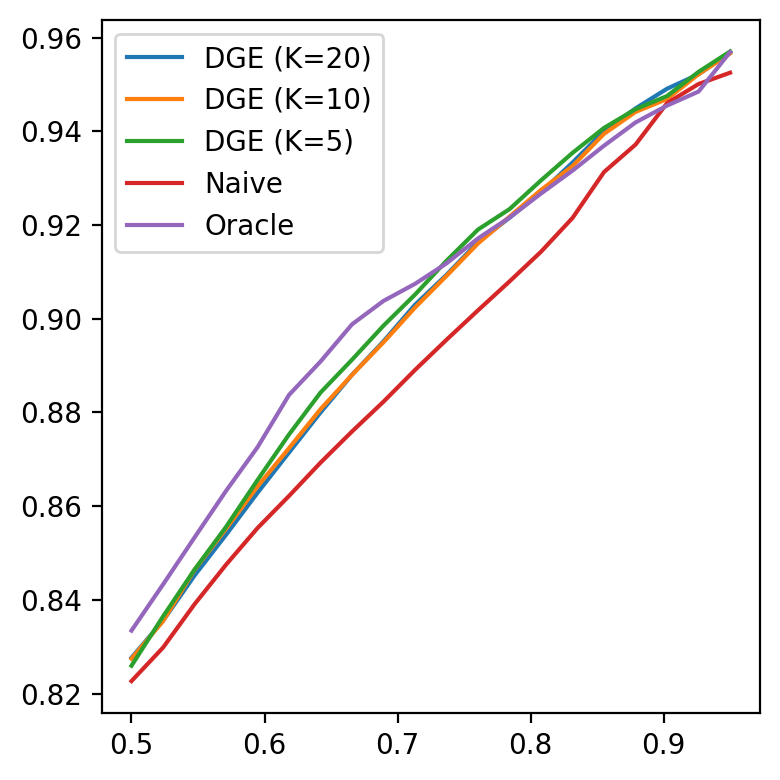

\begin{tabular}{lrrrrrrr}
\toprule
{} &    AUC &    Acc &     F1 &  Precision &  Recall &    NLL &  Brier \\
\midrule
DGE\$\_20\$         &  0.906 &  0.828 &  0.827 &      0.831 &   0.823 &  0.388 &  0.121 \\
DGE\$\_10\$         &  0.906 &  0.827 &  0.828 &      0.823 &   0.834 &  0.390 &  0.121 \\
DGE\$\_5\$          &  0.905 &  0.826 &  0.826 &      0.825 &   0.827 &  0.392 &  0.122 \\
Naive (single)   &  0.902 &  0.823 &  0.829 &      0.803 &   0.856 &  0.399 &  0.125 \\
Naive (ensemble) &  0.904 &  0.823 &  0.829 &      0.800 &   0.860 &  0.397 &  0.124 \\
Oracle           &  0.911 &  0.833 &  0.831 &      0.843 &   0.819 &  0.379 &  0.117 \\
\bottomrule
\end{tabular}

n_total 20000 n_train: 2000
Dataset covid



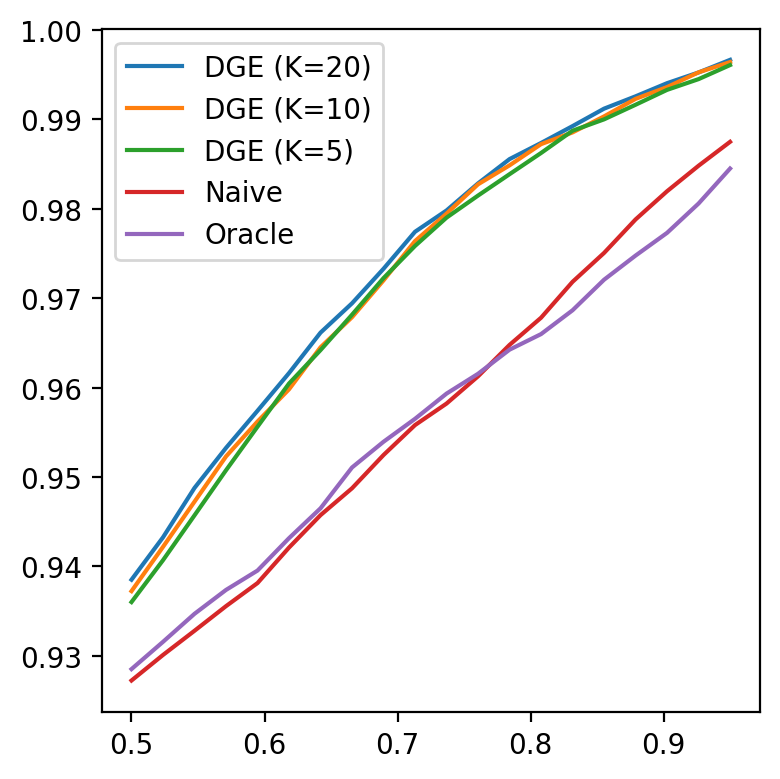

\begin{tabular}{lrrrrrrr}
\toprule
{} &    AUC &    Acc &     F1 &  Precision &  Recall &    NLL &  Brier \\
\midrule
DGE\$\_20\$         &  0.948 &  0.938 &  0.967 &      0.959 &   0.975 &  0.137 &  0.042 \\
DGE\$\_10\$         &  0.946 &  0.937 &  0.966 &      0.959 &   0.974 &  0.139 &  0.043 \\
DGE\$\_5\$          &  0.945 &  0.936 &  0.966 &      0.960 &   0.972 &  0.141 &  0.044 \\
Naive (single)   &  0.929 &  0.926 &  0.960 &      0.961 &   0.959 &  0.177 &  0.053 \\
Naive (ensemble) &  0.929 &  0.927 &  0.961 &      0.961 &   0.960 &  0.170 &  0.051 \\
Oracle           &  0.935 &  0.928 &  0.962 &      0.960 &   0.963 &  0.174 &  0.051 \\
\bottomrule
\end{tabular}



In [ ]:
from DGE_experiments import predictive_experiment
import pandas as pd


all_means = {}
all_stds = {}
dataset_type = 'classification'

for dataset in datasets:
    workspace_folder, results_folder = get_folder_names(
        dataset, model_name, max_n=max_n, nsyn=nsyn)

    X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                          p_train=p_train,
                                          n_models=n_models*num_runs,
                                          model_name=model_name,
                                          load_syn=load_syn,
                                          verbose=verbose,
                                          max_n=max_n,
                                          nsyn=nsyn)
    if X_gt.targettype != dataset_type:
        continue

    print(f'Dataset {dataset}\n')

    means, stds, _ = predictive_experiment(X_gt,
                                            X_syns,
                                            workspace_folder=workspace_folder,
                                            results_folder=results_folder,
                                            save=save,
                                            load=load,
                                            plot=True,
                                            outlier=outlier
                                            )

    print(means.to_latex())

    all_means[dataset] = means
    all_stds[dataset] = stds



In [ ]:
mean_across_pandas(all_means)


\begin{tabular}{lrrrrrrr}
\toprule
{} &   AUC &   Acc &    F1 &  Precision &  Recall &   NLL &  Brier \\
\midrule
DGE\$\_10\$         & 0.916 & 0.855 & 0.814 &      0.845 &   0.790 & 0.316 &  0.100 \\
DGE\$\_20\$         & 0.918 & 0.857 & 0.813 &      0.850 &   0.786 & 0.313 &  0.099 \\
DGE\$\_5\$          & 0.916 & 0.854 & 0.812 &      0.847 &   0.785 & 0.318 &  0.101 \\
Naive (ensemble) & 0.909 & 0.849 & 0.812 &      0.836 &   0.797 & 0.329 &  0.104 \\
Naive (single)   & 0.909 & 0.850 & 0.814 &      0.835 &   0.800 & 0.330 &  0.104 \\
Oracle           & 0.920 & 0.872 & 0.836 &      0.854 &   0.820 & 0.289 &  0.090 \\
\bottomrule
\end{tabular}



AUC    Acc     F1  Precision  Recall    NLL  Brier
DGE$_10$          0.916  0.855  0.814      0.845   0.790  0.316  0.100
DGE$_20$          0.918  0.857  0.813      0.850   0.786  0.313  0.099
DGE$_5$           0.916  0.854  0.812      0.847   0.785  0.318  0.101
Naive (ensemble)  0.909  0.849  0.812      0.836   0.797  0.329  0.104
Naive (single)    0.909  0.850  0.814      0.835   0.800  0.330  0.104
Oracle            0.920  0.872  0.836      0.854   0.820  0.289  0.090

In [ ]:

means_consolidated = metric_different_datasets(all_means, to_print=False)
if num_runs>1:
    stds_consolidated = metric_different_datasets(all_stds)
    print(add_std(means_consolidated, stds_consolidated).to_latex())
else:
    print(means_consolidated.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  Moons &  Circles &  Adult Income &   SEER &  covid &    Mean \\
\midrule
DGE\$\_20\$         &  0.981 &    0.863 &         0.893 &  0.906 &  0.948 &  0.9182 \\
DGE\$\_10\$         &  0.980 &    0.855 &         0.891 &  0.906 &  0.946 &  0.9156 \\
DGE\$\_5\$          &  0.978 &    0.863 &         0.887 &  0.905 &  0.945 &  0.9156 \\
Naive (single)   &  0.985 &    0.857 &         0.871 &  0.902 &  0.929 &  0.9088 \\
Naive (ensemble) &  0.984 &    0.857 &         0.872 &  0.904 &  0.929 &  0.9092 \\
Oracle           &  0.996 &    0.868 &         0.889 &  0.911 &  0.935 &  0.9198 \\
\bottomrule
\end{tabular}



### Run over generative model sizes


In [ ]:
from DGE_experiments import predictive_experiment
import pandas as pd
genrun_all = {}
dataset = 'seer'

max_n = 2000
nsyn = 2000
model_type = 'mlp'
num_runs = 1

for model_name in ['ctgan_shallow', 'ctgan', 'ctgan_deep']:

    workspace_folder, results_folder = get_folder_names(
            dataset, model_name, max_n=max_n, nsyn=nsyn)

    X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                        p_train=p_train,
                                        n_models=n_models*num_runs,
                                        model_name=model_name,
                                        load_syn=load_syn,
                                        verbose=verbose,
                                        max_n=max_n,
                                        nsyn=nsyn)

    print(f'Model {model_name}\n')

    means, stds, all = predictive_experiment(X_gt,
                                            X_syns,
                                            workspace_folder=workspace_folder,
                                            results_folder=results_folder,
                                            task_type=model_type,
                                            save=save,
                                            load=load,
                                            plot=False,
                                            outlier=outlier
                                            )

    all['Generative model'] = model_name
    genrun_all[model_name] = all



n_total 20000 n_train: 2000
Model ctgan_shallow

n_total 20000 n_train: 2000
Model ctgan

n_total 20000 n_train: 2000
Model ctgan_deep



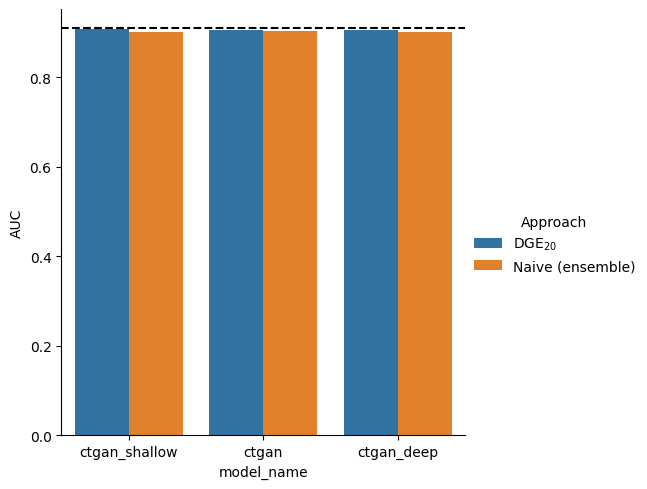

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dfs = pd.concat(genrun_all)
oracle = dfs[dfs['Approach']=='Oracle']
dfs = dfs[(dfs['Approach']=="DGE$_{20}$")|(dfs['Approach']=='Naive (ensemble)')]

metric = 'AUC'

sns.catplot(x='Generative model', y=metric, data=dfs, kind='bar', hue='Approach', aspect=1)

#draw line for oracle mean
plt.axhline(oracle[metric].mean(), color='black', linestyle='--', label='Oracle')
plt.savefig(f'uncertainty_results/training_story_models_{dataset}_{metric}.png')


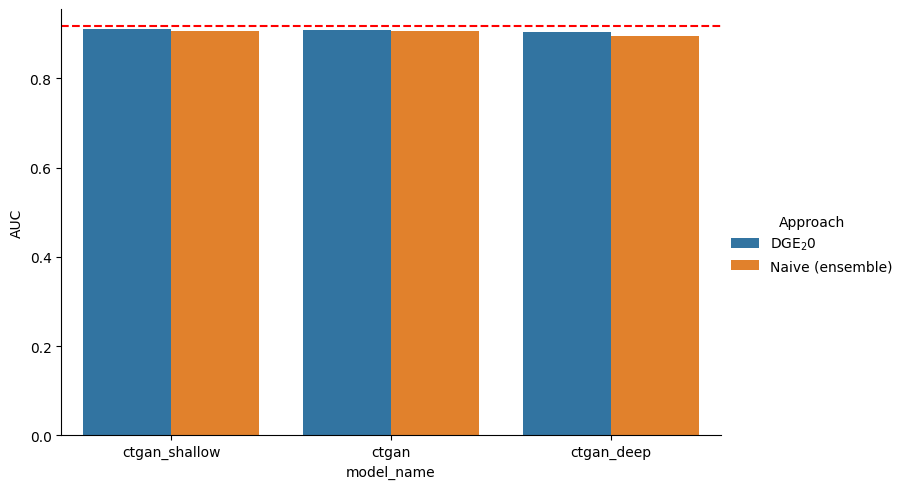

In [29]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # create grouped barplot using seaborn, for each element in genrun_means
# metric = 'AUC'

# dfs = []
# for key in genrun_means.keys():
#     df = pd.DataFrame(genrun_means[key])
#     df_std = pd.DataFrame(genrun_stds[key])
#     df_std.columns = [f'{col}_std' for col in df_std.columns]
#     df = pd.concat([df, df_std], axis=1)
#     df['model_name'] = key
#     dfs.append(df)


# df = pd.concat(dfs, axis=0)
# # rename index to approach
# oracle = df.loc['Oracle'].iloc[0]
# df = df.loc[['DGE$_20$', 'Naive (ensemble)']]
# df['Approach'] = df.index



## Model Evaluation

We compare the single baseline model vs the generative uncertainty model vs an oracle. Workflow.
0. Train and generate synthetic datasets $S_i$.
1. Take each synthetic dataset $S_i$ and split it up in train and test.
2. Train a model $f_i$ on the train set, for each $S_i$
3. Evaluate on the same synthetic dataset's test set $S_{i,test}$, giving $\hat{M}^S_i$ [Single performance]
4. Evaluate on the true real test set (oracle), $D_{test}$, giving $M_i$ [Oracle performance]
5. Evaluate on the other synthetic datasets $\cup_{j\neq i} S_{j}$, giving $\hat{M}^G_i$ [Generative performance]
6. Compute the deviation from the oracle, $||M_i - \hat{M}_i||$ and average over all models $f_i$. 
7. Repeat 1-6 for different model classes $f$

N.B. the idea of the above, is that the trained model $f_i$ is the same for each evaluation type. In the model selection section, we will compare the performance of different model classes, where we will train a new model for each evaluation type (hence the aim is to evaluate which class is best, while the model itself may vary).

Dataset: moons
n_total 10000 n_train: 5000
Approach:  Oracle
Approach:  Naive
Approach:  DGE (K=5)
Approach:  DGE (K=10)
Approach:  DGE (K=20)
Dataset: circles
n_total 10000 n_train: 5000
Approach:  Oracle
Approach:  Naive
Approach:  DGE (K=5)
Approach:  DGE (K=10)
Approach:  DGE (K=20)
Dataset: adult
n_total 32561 n_train: 5000
Approach:  Oracle
Approach:  Naive
Approach:  DGE (K=5)
Approach:  DGE (K=10)
Approach:  DGE (K=20)
Dataset: seer
n_total 20000 n_train: 5000
Approach:  Oracle
Approach:  Naive
Approach:  DGE (K=5)
Approach:  DGE (K=10)
Approach:  DGE (K=20)
Dataset: covid
n_total 20000 n_train: 5000
Approach:  Oracle
Approach:  Naive
Approach:  DGE (K=5)
Approach:  DGE (K=10)
Approach:  DGE (K=20)


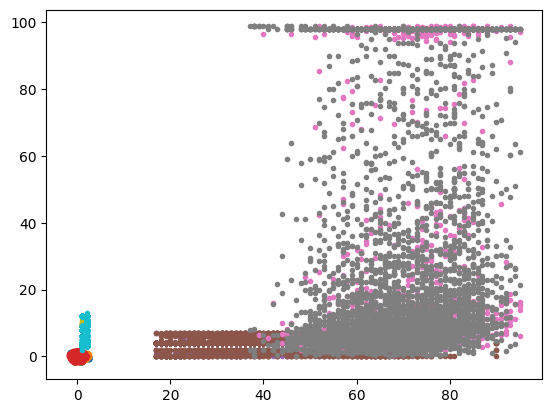

In [3]:
from DGE_experiments import model_evaluation_experiment


evaluation_means = {}
evaluation_std = {}
relative = False
max_n = 5000
nsyn = 5000
model_name = 'ctgan_deep'
datasets = ['moons', 'circles', 'adult', 'seer', 'covid']
model_type = 'deepish_mlp'
verbose = True

for dataset in datasets:
    print('Dataset:', dataset)
    workspace_folder, results_folder = get_folder_names(
        dataset, model_name, max_n=max_n, nsyn=nsyn)


    

    # load data
    X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                          p_train=p_train,
                                          n_models=n_models,
                                          model_name=model_name,
                                          load_syn=load_syn,
                                          verbose=verbose,
                                          max_n=max_n,
                                          nsyn=nsyn)

    # get mean and std of dataset over different runs
    means, std, _ = model_evaluation_experiment(X_gt, X_syns, workspace_folder=workspace_folder, relative=relative,
                                             model_type=model_type,
                                             load=load,
                                             save=load,
                                             verbose=verbose,
                                             outlier=outlier,
                                             )

    evaluation_means[dataset] = means
    evaluation_std[dataset] = std


In [5]:
# mean across datasets
# mean_across_pandas(evaluation_means)
# per dataset
metric = 'Acc'
res = metric_different_datasets(evaluation_means, metric=metric, to_print=False)
std_df = metric_different_datasets(evaluation_std, metric=metric, to_print=False)

del std_df['Mean']
res = add_std(res, std_df)
if relative != 'l2':
    print(res.to_latex(float_format=lambda x: '%.3f' % x))
else:
    print(res.to_latex(float_format=lambda x: '%.5f' % x))

\begin{tabular}{lllllll}
\toprule
{} &          Moons &        Circles &   Adult Income &           SEER &          covid &   Mean \\
\midrule
Oracle     &   0.775 ± 0.14 &  0.508 ± 0.036 &  0.785 ± 0.015 &  0.711 ± 0.108 &  0.912 ± 0.014 &  0.738 \\
Naive      &  0.892 ± 0.072 &  0.819 ± 0.132 &  0.784 ± 0.028 &  0.877 ± 0.061 &  0.832 ± 0.042 &  0.841 \\
DGE (K=5)  &  0.703 ± 0.132 &   0.518 ± 0.07 &   0.773 ± 0.01 &  0.743 ± 0.129 &  0.819 ± 0.022 &  0.711 \\
DGE (K=10) &  0.744 ± 0.139 &  0.522 ± 0.094 &   0.774 ± 0.01 &  0.772 ± 0.088 &   0.81 ± 0.017 &  0.724 \\
DGE (K=20) &  0.753 ± 0.138 &  0.506 ± 0.045 &   0.775 ± 0.01 &  0.769 ± 0.069 &  0.815 ± 0.016 &  0.724 \\
\bottomrule
\end{tabular}



### Run over syntheticically generated data sizes


In [3]:
from DGE_experiments import model_evaluation_experiment

genrun_means = {}
genrun_stds = {}
genrun_all = {}
dataset = 'seer'
relative = False

max_n = 5000
nsyn = 5000

for model_name in ['ctgan_shallow', 'ctgan', 'ctgan_deep']:

    workspace_folder, results_folder = get_folder_names(
            dataset, model_name, max_n=max_n, nsyn=nsyn)

    X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                        p_train=p_train,
                                        n_models=n_models,
                                        model_name=model_name,
                                        load_syn=load_syn,
                                        verbose=verbose,
                                        max_n=max_n,
                                        nsyn=nsyn)


    _, _, all = model_evaluation_experiment(X_gt, X_syns, workspace_folder=workspace_folder, relative=relative,
                                             model_type='deep_mlp',
                                             load=load,
                                             save=load,
                                             verbose=verbose,
                                             outlier=outlier,
                                             )

    all['model_name'] = model_name
    genrun_all[model_name] = all
    

n_total 20000 n_train: 5000
n_total 20000 n_train: 5000
n_total 20000 n_train: 5000


In [41]:
genrun_all.keys()

dict_keys(['ctgan_shallow', 'ctgan', 'ctgan_deep'])

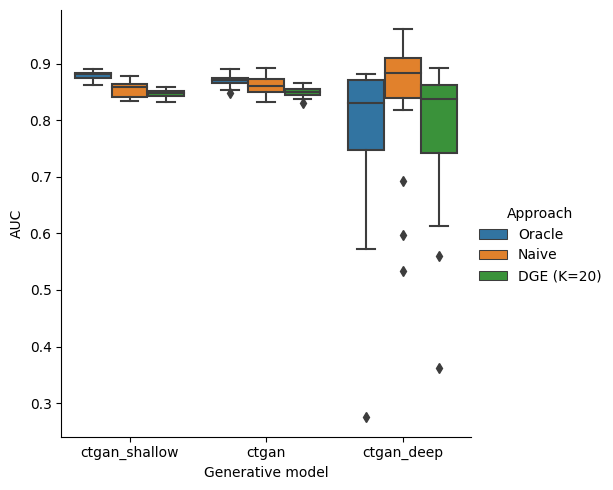

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

metric = 'AUC'
dfs = pd.concat(genrun_all,axis=0)
dfs.reset_index(inplace=True)
dfs['Generative model'] = dfs['level_0']
dfs = dfs[(dfs['Approach']=="DGE$_{20}$")|(dfs['Approach']=="DGE (K=20)")|(dfs['Approach']=='Naive')|(dfs['Approach']=='Oracle')]
sns.catplot(x='Generative model', y=metric, data=dfs, kind='box', hue='Approach', aspect=1)
plt.savefig(f'uncertainty_results/eval_story_models_{dataset}_{metric}.png')
#draw line for oracle mean


In [52]:
from DGE_experiments import model_evaluation_experiment

nsynrun_all = {}
dataset = 'seer'
relative = False

max_n = 2000
model_name = 'ctgan'
n_models=20
verbose = True
for nsyn in [2000, 5000, 10000]:

    workspace_folder, results_folder = get_folder_names(
            dataset, model_name, max_n=max_n, nsyn=nsyn)

    X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                        p_train=p_train,
                                        n_models=n_models,
                                        model_name=model_name,
                                        load_syn=load_syn,
                                        verbose=verbose,
                                        max_n=max_n,
                                        nsyn=nsyn)

   
    _, _, all = model_evaluation_experiment(X_gt, X_syns, workspace_folder=workspace_folder, relative=relative,
                                             model_type='deep_mlp',
                                             load=load,
                                             save=load,
                                             verbose=verbose,
                                             outlier=outlier,
                                             )

    all['nsyn'] = nsyn
    nsynrun_all[nsyn] = all
    

n_total 20000 n_train: 2000
Approach:  Oracle
Approach:  Naive
Approach:  DGE (K=5)
Approach:  DGE (K=10)
Approach:  DGE (K=20)
n_total 20000 n_train: 2000
Generating more data, existing dataset is smaller than nsyn
Training model 12/20


100%|██████████| 2000/2000 [05:07<00:00,  6.51it/s]


Generating more data, existing dataset is smaller than nsyn
Training model 13/20


 19%|█▉        | 382/2000 [00:57<04:06,  6.58it/s]

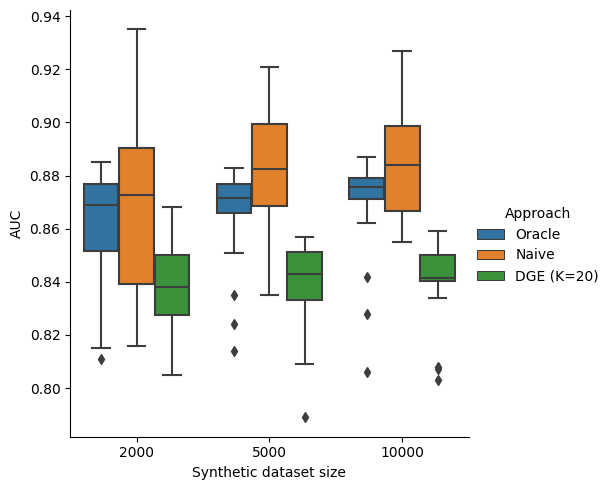

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dfs = pd.concat(nsynrun_all, axis=0)

metric = 'AUC'
dfs.reset_index(inplace=True)
dfs['Synthetic dataset size'] = dfs['level_0']
dfs = dfs[(dfs['Approach']=="DGE$_{20}$")|(dfs['Approach']=="DGE (K=20)")|(dfs['Approach']=='Naive')|(dfs['Approach']=='Oracle')]
sns.catplot(x='Synthetic dataset size', y=metric, data=dfs, kind='box', hue='Approach', aspect=1)
plt.savefig(f'uncertainty_results/eval_story_nsyn_{dataset}_{metric}.png')
#draw line for oracle mean


## Model Selection
Essentially repeat the above for different models

In [13]:
from DGE_experiments import model_selection_experiment

# load data
dataset = 'seer'
X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                        p_train=p_train,
                                        n_models=n_models,
                                        model_name=model_name,
                                        load_syn=load_syn,
                                        verbose=verbose,
                                        max_n=max_n,
                                        nsyn=nsyn)



workspace_folder, results_folder = get_folder_names(
    dataset, model_name, max_n=max_n, nsyn=nsyn)

means_sorted, std = model_selection_experiment(X_gt, X_syns, relative=False,
                                                    workspace_folder=workspace_folder, 
                                                    load=load, save=save)




n_total 20000 n_train: 2000


KeyboardInterrupt: 

In [ ]:
metric = 'AUC'
print(means_sorted[metric])
print(add_std(means_sorted[metric].iloc[:5], std[metric]).to_latex())

                 deep_mlp    svm    knn  xgboost     rf    mlp     lr
Oracle              0.767  0.781  0.800    0.838  0.844  0.849  0.869
Naive               0.849  0.804  0.823    0.885  0.873  0.867  0.866
DGE (K=5)           0.797  0.819  0.831    0.859  0.870  0.873  0.884
DGE (K=10)          0.798  0.811  0.826    0.850  0.861  0.871  0.878
DGE (K=20)          0.778  0.796  0.807    0.836  0.849  0.856  0.865
Oracle rank         7.000  6.000  5.000    4.000  3.000  2.000  1.000
Naive rank          5.000  7.000  6.000    1.000  2.000  3.000  4.000
DGE (K=5) rank      7.000  6.000  5.000    4.000  3.000  2.000  1.000
DGE (K=10) rank     7.000  6.000  5.000    4.000  3.000  2.000  1.000
DGE (K=20) rank     7.000  6.000  5.000    4.000  3.000  2.000  1.000


In [ ]:
A = add_std(means_sorted[metric].iloc[:5], std[metric])
B = means_sorted[metric].iloc[5:]
B.index = [f'{i}'.replace(' rank','') for i in B.index]
B = B.astype(int)
B.columns = ['' for i in B.columns]
C = pd.concat([A, B], axis=1)
print(C.to_latex())


\begin{tabular}{llllllllrrrrrrr}
\toprule
{} &       deep\_mlp &            svm &            knn &        xgboost &             rf &            mlp & \multicolumn{8}{l}{lr} \\
\midrule
Oracle     &  0.767 ± 0.158 &   0.781 ± 0.16 &    0.8 ± 0.102 &  0.838 ± 0.054 &  0.844 ± 0.053 &  0.849 ± 0.116 &  0.869 ± 0.062 &  7 &  6 &  5 &  4 &  3 &  2 &  1 \\
Naive      &  0.849 ± 0.113 &  0.804 ± 0.187 &  0.823 ± 0.118 &  0.885 ± 0.085 &  0.873 ± 0.075 &  0.867 ± 0.143 &  0.866 ± 0.104 &  5 &  7 &  6 &  1 &  2 &  3 &  4 \\
DGE (K=5)  &  0.797 ± 0.189 &  0.819 ± 0.184 &  0.831 ± 0.132 &   0.859 ± 0.07 &   0.87 ± 0.072 &  0.873 ± 0.137 &  0.884 ± 0.088 &  7 &  6 &  5 &  4 &  3 &  2 &  1 \\
DGE (K=10) &  0.798 ± 0.144 &  0.811 ± 0.171 &   0.826 ± 0.12 &   0.85 ± 0.064 &  0.861 ± 0.063 &  0.871 ± 0.101 &  0.878 ± 0.065 &  7 &  6 &  5 &  4 &  3 &  2 &  1 \\
DGE (K=20) &  0.778 ± 0.139 &  0.796 ± 0.159 &   0.807 ± 0.11 &  0.836 ± 0.064 &  0.849 ± 0.057 &  0.856 ± 0.104 &  0.865 ± 0.071 &  7 &  6 &  

## Influence of synthetic data size

Let's study the effect of synthetic data size.

In [ ]:
from DGE_experiments import predictive_varying_nsyn

predictive_varying_nsyn(X_gt, X_syns, dataset, model_name,
                        nsyn, results_folder, workspace_folder, load=load, save=save, verbose=True)


## Density estimation


In [ ]:
# from DGE_experiments import density_experiment

# if X_gt.targettype is None:
#    density_experiment(X_gt, X_syns, load, save)


# Cross validation

We compare the single baseline model vs the generative uncertainty model. Single workflow
1. Take each synthetic dataset $S_i$ and split it up in train and test.
2. Train a model $f_i$ on the train set, for each $S_i$
3. Evaluate on the same synthetic datasets test set $S_{i,test}$
4. Evaluate on the true real test set (oracle), $D_{test}$, giving $\hat{M}_i$
5. Average results across the different synthetic datasets, giving $M_i$.
6. Compute the deviation from the oracle, $||M_i - \hat{M}_i||$ and average.

Versus our baseline
1. Take each synthetic dataset $S_i$ and split it up in train and test
2. Train a model $f_i$ on the train set, for each $S_i$
3. Evaluate on the same synthetic datasets test set $S_{i,test}
4. Evaluate on the true real test set (oracle), $D_{test}$, giving $\hat{M}_i$
5. Average results across the different synthetic datasets, giving $M_i$.
6. Compute the deviation from the oracle, $||M_i - \hat{M}_i||$ and average.


Cross-validation approach to test which type of model would perform best on real data. We compare the single baseline model vs the generative uncertainty model vs an oracle. Workflow Cross-validation.
0. Train and generate synthetic datasets $S_i$.
1. Use CV to train and evaluate models $f_i$ on each $S_i$. Repeat for all $S_i$. [Single performance]
2. Use CV \textit{over datasets $S_i$} (i.e. train on all but one $S_i$, evaluate on remaining and repeat) to train and evaluate models $f_i$.
3. For both cases, evaluate the model also on the true real test set (oracle), $D_{test}$, giving $M_i$ [Oracle performance]
4. Compute the deviation from the oracle, $||M_i - \hat{M}_i||$ and average over all models $f_i$. 